In [1]:
%matplotlib inline
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,confusion_matrix,accuracy_score
from tensorflow.keras.applications import VGG16, ResNet50,VGG19,ResNet50V2,EfficientNetB0
from sklearn.preprocessing import StandardScaler
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
from Visualize import *
from Preprocess import *
import soundfile as sf
from pathlib import *
import pandas as pd
import numpy as np
import librosa
import glob
import shutil
import os
import cv2

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

In [4]:
INPUT_PATH = Path('/net/store/cbc/projects/Pan troglodytes/audio_PH_dataset/PH/good_data/')
file_path =  '/net/store/cv/users/ybrima/scratch/data/Luango_Speaker/clip_loango.npz'
file_path2 =  '/net/store/cv/users/ybrima/scratch/data/Luango_Speaker/clip_loango_resized.npz'
BASE_PATH =  '/net/store/cv/users/ybrima/scratch/data/Luango_Speaker/'
FRAME_LENGHT =  1024
SAMPLE_RATE =  44100
HOP_LENGTH =  512

In [5]:
figures = Path('/content/drive/MyDrive/Colab Notebooks/Experiments/Figures/')

In [6]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

with np.load(file_path,allow_pickle=True) as data:
    X = data['x']
    y = data['y']
    Z =  data['z']
    CLASSES = list(data['c'])

In [7]:
X =  (X - X.mean(axis=0, keepdims=True))/X.std(axis=0,keepdims=True)

In [8]:
input_shape =  (X.shape[1],X.shape[2],1)
output_nums =  len(CLASSES)
X = X[...,np.newaxis]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, shuffle=True)

In [38]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [41]:
for i, (x,y) in train_dataset.enumerate():
    print(x.shape)
    break

(129, 87, 1)


In [16]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 50

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

In [33]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [34]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [30]:
model.evaluate(test_dataset)

3/3 [==============================] - 0s 5ms/step - loss: 7.6655 - sparse_categorical_accuracy: 0.4689


[7.665534973144531, 0.4689265489578247]

In [13]:
# data =  np.load(file_path, allow_pickle=True)
# X = data['x']
# y = data['y']
# Z =  data['z']
# CLASSES = list(data['c'])

In [7]:
def make_model(input_shape, output_nums):
    K.clear_session() # Clear previous models from memory.
    base_model = VGG16(weights=None, include_top=False, input_shape=input_shape)
    x = base_model.output
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(output_nums, activation='softmax')(x)
    model = keras.Model(inputs=base_model.input, outputs=x)
    optim_params = dict(learning_rate = 0.003,momentum = 0.9394867962846013,decay = 0.0003)
    model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(**optim_params),metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")]) #keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='sparse_top_5_categorical_accuracy')
    return model

In [8]:
X =  (X - X.mean(axis=0, keepdims=True))/X.std(axis=0,keepdims=True)

In [9]:
input_shape =  (X.shape[1],X.shape[2],1)
output_nums =  len(CLASSES)
X = X[...,np.newaxis]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, shuffle=True)

In [11]:
model =  make_model(input_shape, output_nums)

In [12]:
history =  model.fit(x=X_train,y=y_train, batch_size=8, epochs=40, validation_split=0.1,verbose=1 )
model.evaluate(x=X_test,y=y_test)

Epoch 1/40


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/block1_conv1/Conv2D
 (defined at /net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/layers/convolutional.py:231)
]] [Op:__inference_train_function_1527]

Errors may have originated from an input operation.
Input Source operations connected to node model/block1_conv1/Conv2D:
In[0] IteratorGetNext (defined at /net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/training.py:866)	
In[1] model/block1_conv1/Conv2D/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 619, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/tornado/ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/tornado/ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/tornado/gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/tornado/gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 358, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 536, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-12-5c7aef118e7c>", line 1, in <module>
>>>     history =  model.fit(x=X_train,y=y_train, batch_size=8, epochs=40, validation_split=0.1,verbose=1 )
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/layers/convolutional.py", line 246, in call
>>>     outputs = self.convolution_op(inputs, self.kernel)
>>> 
>>>   File "/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/keras/layers/convolutional.py", line 231, in convolution_op
>>>     return tf.nn.convolution(
>>> 

RuntimeError: Physical devices cannot be modified after being initialized

In [15]:
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



In [ ]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 12

In [ ]:
def display(X,Z,y,CLASSES,n=6,flag =  False, save=True,filename='Sample_Plot.png'):
  idx =  np.random.randint(0, X.shape[0], n)
  fig = plt.figure(1,figsize=(24,8))
  for i in range(len(idx)):
    ax = plt.subplot(2,3,i+1)
    if(flag ==  False):
      librosa.display.waveplot(Z[idx[i]],sr=SAMPLE_RATE,alpha=0.6)
      plt.xlabel("time")
      plt.ylabel("amplitude")
    else:
      img = librosa.display.specshow(X[idx[i]].reshape(X[idx[i]].shape[0],X[idx[i]].shape[1]),sr=SAMPLE_RATE,y_axis='mel', x_axis='time', hop_length=HOP_LENGTH) #
      fig.colorbar(img, ax=ax, format='%+2.0f dB')
    plt.title(CLASSES[y[idx[i]]])
  plt.tight_layout()
  if(flag ==  False):
    plt.savefig(f'{figures}/{filename}', bbox_inches ="tight", dpi=300)
  else:
    if(save):
      plt.savefig(f'{figures}/{filename}', bbox_inches ="tight", dpi=300)
  plt.show()

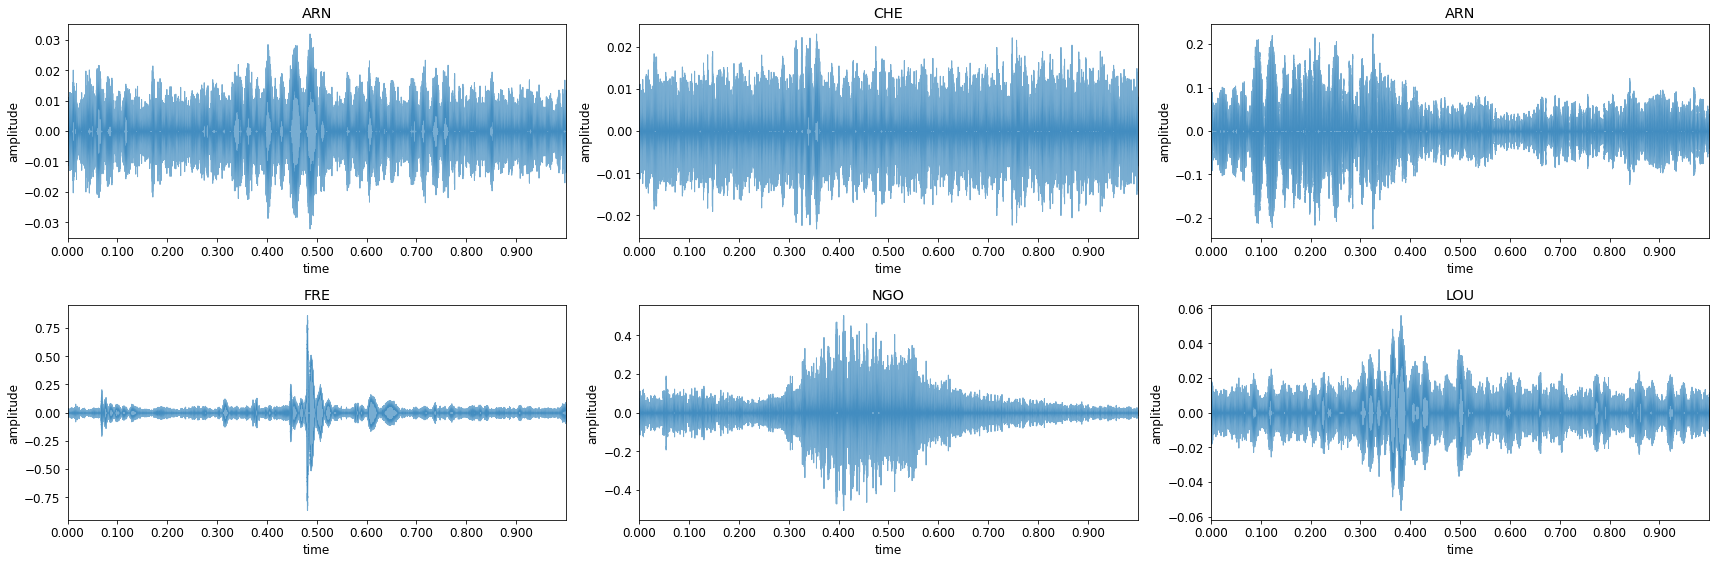

In [ ]:
display(X,Z,y,CLASSES,filename='Sample_Waveplot.png')

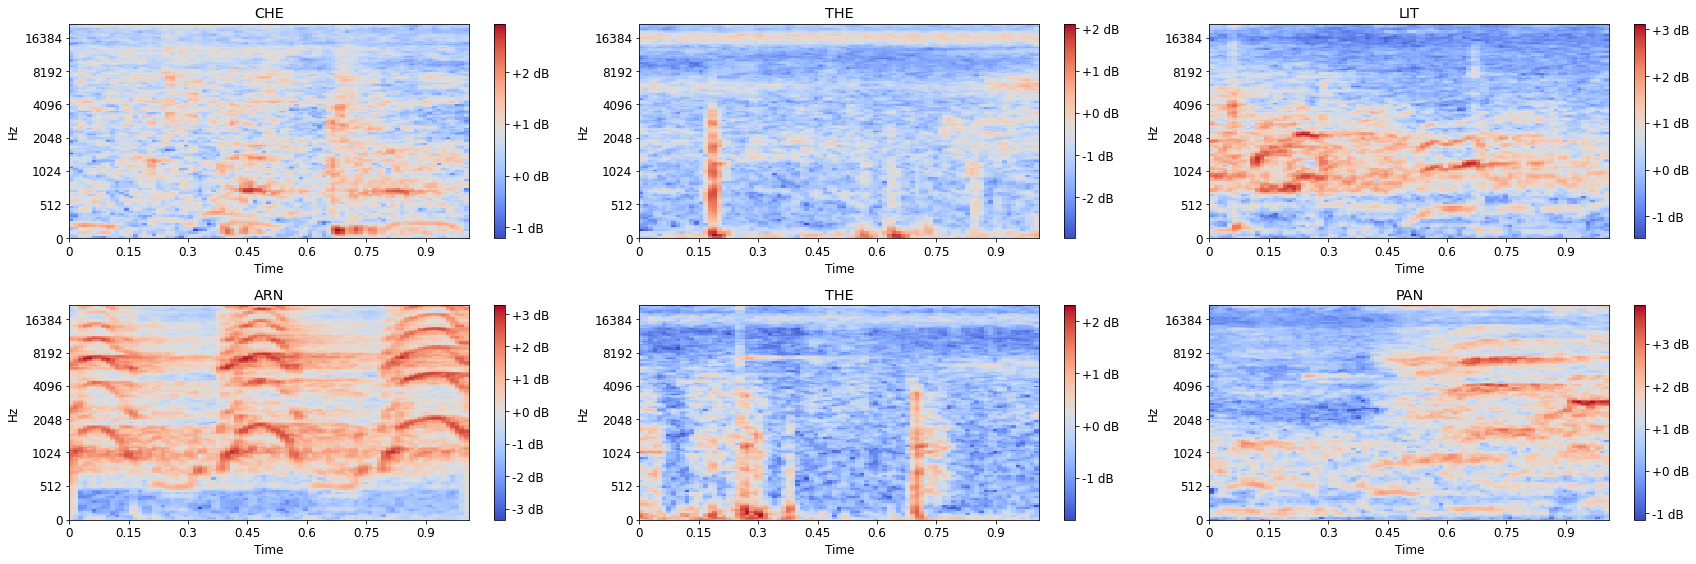

In [ ]:
display(X,Z,y,CLASSES, flag=True, save=True, filename='Normalized_Frequency_MelSpectogram.png')